# **Classification tools in MLLib** : Roberto Hernandez Ruiz

In this session, we are going to work with the [MNIST dataset](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist), a widely used dataset in machine learning for testing classification algorithms. The goal of the problem is automatically classify digit images with 784 (28x28) pixels among the ten possible digits.

We will start working with a reduced version of this dataset consisting of 60,000 training data and 10,000 test samples. But, after completing this notebook, you can analyze the scalability of the different approaches by using the [large version of the MNIST dataset](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist8m) with 8.100.000 patterns.

In this notebook we will learn to manage the classification tools avaliable in MLLIB, selecting a linear SVM as example of classifier. The outline of this notebook is:

**1. Data reading and preprocessing**

  a) Loading the training data
  
  b) Data analysis
  
  c) Data preprocessing: normalization
  
  d) Preparing training DF
  
  e) Preparing the test DF
  
**2. Solving classification problems**

  a) Binary classification with SVMs
    
  b) SVM evaluation
    
  c) Multiclass SVM
    
  d) Cross validation of hyperparameters

## **1. Data reading and preprocessing**

### **1.a) Loading the training data**

Together with this notebook, you have downloaded two data files:
* "mnist": where you can find the 60.000 training data
* "mnist.t": where there are additional 10.000 test images

Let's start uploading these files to Databricks and let's load the training file to analyze the format of the data.

In [ ]:
# Load the data file as a DF (you need to have uploaded the file  'mnist' to Databricks)
fileName = "dbfs:/FileStore/shared_uploads/100449779@alumnos.uc3m.es/mnist-1"
textDF = sqlContext.read.text(fileName)

** Exercise:**
Once the data are loaded in the variable textDF:
1. Show the first 10 lines of the DF
2. Count the total number of lines in the file (or rows of the DF)
3. Show the content of the first line

In [ ]:
# 1. Show the first 10 lines of the DF
print(textDF.head(10))

# 2. Number of lines
n_lines = textDF.count()
print ('Number of lines: ' + str(n_lines))

# 3. Content of the first line
line = textDF.head(1)
print ('First line content:')
print (line)

[Row(value='5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35 378:241 379:225 380:160 381:108 382:1 406:81 407:240 408:253 409:253 410:119 411:25 435:45 436:186 437:253 438:253 439:150 440:27 464:16 465:93 466:252 467:253 468:187 494:249 495:253 496:249 497:64 519:46 520:130 521:183 522:253 523:253 524:207 525:2 545:39 546:148 547:229 548:253 549:253 550:253 551:250 552:182 571:24 572:114 573:221 574:253 575:253 576:253 577:253 578:201 579:78 597:23 598:66 599:213 600:253 601:253 602:253 603:253 604:198 605:81 606:2 623:18 624:171 625:219 626:253 627:253 628:253 629:253 630:195 631:80 632:9 649:55 650:172 651:226 652:253 653:253 654:253 655:253 656:244 657:133 658:11 677:136 678:253 679:253 680:253 681:212 682:135 683:132 684:16'), Row(value='0 128:51 129:159 130:253 131:159 132:50 155:48 156:238 157:252 158:252 159:252 160:237 182:54 183:227 184:253 185:252 186:239 187:233 188:252 189:57 190:6 208:10 209:60 210:224 211:252 212:253 213:252 214:202 215:84 216:252 217:253 218:122 236:163 237:252 238:252 239:252 240:253 241:252 242:252 243:96 244:189 245:253 246:167 263:51 264:238 265:253 266:253 267:190 268:114 269:253 270:228 271:47 272:79 273:255 274:168 290:48 291:238 292:252 293:252 294:179 295:12 296:75 297:121 298:21 301:253 302:243 303:50 317:38 318:165 319:253 320:233 321:208 322:84 329:253 330:252 331:165 344:7 345:178 346:252 347:240 348:71 349:19 350:28 357:253 358:252 359:195 372:57 373:252 374:252 375:63 385:253 386:252 387:195 400:198 401:253 402:190 413:255 414:253 415:196 427:76 428:246 429:252 430:112 441:253 442:252 443:148 455:85 456:252 457:230 458:25 467:7 468:135 469:253 470:186 471:12 483:85 484:252 485:223 494:7 495:131 496:252 497:225 498:71 511:85 512:252 513:145 521:48 522:165 523:252 524:173 539:86 540:253 541:225 548:114 549:238 550:253 551:162 567:85 568:252 569:249 570:146 571:48 572:29 573:85 574:178 575:225 576:253 577:223 578:167 579:56 595:85 596:252 597:252 598:252 599:229 600:215 601:252 602:252 603:252 604:196 605:130 623:28 624:199 625:252 626:252 627:253 628:252 629:252 630:233 631:145 652:25 653:128 654:252 655:253 656:252 657:141 658:37'), Row(value='4 161:67 162:232 163:39 173:62 174:81 189:120 190:180 191:39 201:126 202:163 216:2 217:153 218:210 219:40 229:220 230:163 244:27 245:254 246:162 257:222 258:163 272:183 273:254 274:125 284:46 285:245 286:163 300:198 301:254 302:56 312:120 313:254 314:163 327:23 328:231 329:254 330:29 340:159 341:254 342:120 355:163 356:254 357:216 358:16 368:159 369:254 370:67 380:14 381:86 382:178 383:248 384:254 385:91 396:159 397:254 398:85 402:47 403:49 404:116 405:144 406:150 407:241 408:243 409:234 410:179 411:241 412:252 413:40 424:150 425:253 426:237 427:207 428:207 429:207 430:253 431:254 432:250 433:240 434:198 435:143 436:91 437:28 438:5 439:233 440:250 453:119 454:177 455:177 456:177 457:177 458:177 459:98 460:56 466:102 467:254 468:220 494:169 495:254 496:137 522:169 523:254 524:57 550:169 551:254 552:57 578:169 579:255 580:94 606:169 607:254 608:96 634:169 635:254 636:153 662:169 663:255 664:153 690:96 691:254 692:153'), Row(value='1 159:124 160:253 161:255 162:63 186:96 187:244 188:251 189:253 190:62 214:127 215:251 216:251 217:253 218:62 241:68 242:236 243:251 244:211 245:31 246:8 268:60 269:228 270:251 271:251 272:94 296:155 297:253 298:253 299:189 323:20 324:253 325:251 326:235 327:66 350:32 351:205 352:253 353:251 354:126 378:104 379:251 380:253 381:184 382:15 405:80 406:240 407:251 408:193 409:23 432:3

**_The answer should be_:**
<pre><code>
+--------------------+
|               value|
+--------------------+
|5 153:3 154:18 15...|
|0 128:51 129:159 ...|
|4 161:67 162:232 ...|
|1 159:124 160:253...|
|9 209:55 210:148 ...|
|2 156:13 157:25 1...|
|1 125:145 126:255...|
|3 152:38 153:43 1...|
|1 153:5 154:63 15...|
|4 135:189 136:190...|
+--------------------+
only showing top 10 rows

Number of lines: 60000
First line content:
Row(value=u'5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35 378:241 379:225 380:160 381:108 382:1 406:81 407:240 408:253 409:253 410:119 411:25 435:45 436:186 437:253 438:253 439:150 440:27 464:16 465:93 466:252 467:253 468:187 494:249 495:253 496:249 497:64 519:46 520:130 521:183 522:253 523:253 524:207 525:2 545:39 546:148 547:229 548:253 549:253 550:253 551:250 552:182 571:24 572:114 573:221 574:253 575:253 576:253 577:253 578:201 579:78 597:23 598:66 599:213 600:253 601:253 602:253 603:253 604:198 605:81 606:2 623:18 624:171 625:219 626:253 627:253 628:253 629:253 630:195 631:80 632:9 649:55 650:172 651:226 652:253 653:253 654:253 655:253 656:244 657:133 658:11 677:136 678:253 679:253 680:253 681:212 682:135 683:132 684:16')
</code></pre>

If you analyze the content of the first line, you can check that the labels and the variables are mixed. And, in addition, the variables appear in a sparse format. This data format (known as LIBSVM format) is very common in practice to store [labeled sparse data](https://spark.apache.org/docs/2.2.0/mllib-data-types.html#labeled-point). In fact, this is a text format in which each line represents a labeled sparse feature vector using the following convention:

    label index1:value1 index2:value2 ...
where the indices are one-based and in ascending order. 

By luck, MLLIB includes a specific funtion [spark.read.format("libsvm")](https://spark.apache.org/docs/latest/sql-programming-guide.html#manually-specifying-options) which directly reads this format data file and returns a DF with two columns: "label" and "features". Besides, the features are saved in a pyspark.ml.linalg.SparseVector. 

  *A sparse vector is backed by two parallel arrays: indices and values. For example, a vector (1.0, 0.0, 3.0) can be represented in sparse format as (3, [0, 2], [1.0, 3.0]), where 3 is the size of the vector.*

Run the next cell to load the datafile with the spark.read.format("libsvm") function.

*Note:* To load the data, we have indicated with the option "numFeatures" that the total number of pixels is 784. This is useful when some pixels may not present in certain files (because there are always zero), avoiding inconsistent dimensions.

In [ ]:
fileName = "dbfs:/FileStore/shared_uploads/100449779@alumnos.uc3m.es/mnist-1"
dataDF = spark.read.format("libsvm").option("numFeatures", "784").load(fileName)

** Exercise:**
Using the structured DF "dataDF", analyze again:
1. The content of the first 5 lines of the DF
2. Count the total number of lines in the file (or rows of the DF)
3. Show the content of the first line: extracting separately the label and the features. What data type is used to store the features?

In [ ]:
# 1. Show the first 10 lines of the DF
dataDF.display(10)

# 2. Number of lines
n_lines = dataDF.count()
print ('Number of lines: ' + str(n_lines))

# 3. Content of the first line: extrating the label and the features
line = dataDF.head()

label,features
5.0,"Map(vectorType -> sparse, length -> 784, indices -> List(152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 260, 261, 262, 263, 264, 265, 266, 268, 269, 289, 290, 291, 292, 293, 319, 320, 321, 322, 347, 348, 349, 350, 376, 377, 378, 379, 380, 381, 405, 406, 407, 408, 409, 410, 434, 435, 436, 437, 438, 439, 463, 464, 465, 466, 467, 493, 494, 495, 496, 518, 519, 520, 521, 522, 523, 524, 544, 545, 546, 547, 548, 549, 550, 551, 570, 571, 572, 573, 574, 575, 576, 577, 578, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 676, 677, 678, 679, 680, 681, 682, 683), values -> List(3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 253.0, 253.0, 225.0, 172.0, 253.0, 242.0, 195.0, 64.0, 49.0, 238.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 251.0, 93.0, 82.0, 82.0, 56.0, 39.0, 18.0, 219.0, 253.0, 253.0, 253.0, 253.0, 253.0, 198.0, 182.0, 247.0, 241.0, 80.0, 156.0, 107.0, 253.0, 253.0, 205.0, 11.0, 43.0, 154.0, 14.0, 1.0, 154.0, 253.0, 90.0, 139.0, 253.0, 190.0, 2.0, 11.0, 190.0, 253.0, 70.0, 35.0, 241.0, 225.0, 160.0, 108.0, 1.0, 81.0, 240.0, 253.0, 253.0, 119.0, 25.0, 45.0, 186.0, 253.0, 253.0, 150.0, 27.0, 16.0, 93.0, 252.0, 253.0, 187.0, 249.0, 253.0, 249.0, 64.0, 46.0, 130.0, 183.0, 253.0, 253.0, 207.0, 2.0, 39.0, 148.0, 229.0, 253.0, 253.0, 253.0, 250.0, 182.0, 24.0, 114.0, 221.0, 253.0, 253.0, 253.0, 253.0, 201.0, 78.0, 23.0, 66.0, 213.0, 253.0, 253.0, 253.0, 253.0, 198.0, 81.0, 2.0, 18.0, 171.0, 219.0, 253.0, 253.0, 253.0, 253.0, 195.0, 80.0, 9.0, 55.0, 172.0, 226.0, 253.0, 253.0, 253.0, 253.0, 244.0, 133.0, 11.0, 136.0, 253.0, 253.0, 253.0, 212.0, 135.0, 132.0, 16.0))"
0.0,"Map(vectorType -> sparse, length -> 784, indices -> List(127, 128, 129, 130, 131, 154, 155, 156, 157, 158, 159, 181, 182, 183, 184, 185, 186, 187, 188, 189, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 289, 290, 291, 292, 293, 294, 295, 296, 297, 300, 301, 302, 316, 317, 318, 319, 320, 321, 328, 329, 330, 343, 344, 345, 346, 347, 348, 349, 356, 357, 358, 371, 372, 373, 374, 384, 385, 386, 399, 400, 401, 412, 413, 414, 426, 427, 428, 429, 440, 441, 442, 454, 455, 456, 457, 466, 467, 468, 469, 470, 482, 483, 484, 493, 494, 495, 496, 497, 510, 511, 512, 520, 521, 522, 523, 538, 539, 540, 547, 548, 549, 550, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 622, 623, 624, 625, 626, 627, 628, 629, 630, 651, 652, 653, 654, 655, 656, 657), values -> List(51.0, 159.0, 253.0, 159.0, 50.0, 48.0, 238.0, 252.0, 252.0, 252.0, 237.0, 54.0, 227.0, 253.0, 252.0, 239.0, 233.0, 252.0, 57.0, 6.0, 10.0, 60.0, 224.0, 252.0, 253.0, 252.0, 202.0, 84.0, 252.0, 253.0, 122.0, 163.0, 252.0, 252.0, 252.0, 253.0, 252.0, 252.0, 96.0, 189.0, 253.0, 167.0, 51.0, 238.0, 253.0, 253.0, 190.0, 114.0, 253.0, 228.0, 47.0, 79.0, 255.0, 168.0, 48.0, 238.0, 252.0, 252.0, 179.0, 12.0, 75.0, 121.0, 21.0, 253.0, 243.0, 50.0, 38.0, 165.0, 253.0, 233.0, 208.0, 84.0, 253.0, 252.0, 165.0, 7.0, 178.0, 252.0, 240.0, 71.0, 19.0, 28.0, 253.0, 252.0, 195.0, 57.0, 252.0, 252.0, 63.0, 253.0, 252.0, 195.0, 198.0, 253.0, 190.0, 255.0, 253.0, 196.0, 76.0, 246.0, 252.0, 112.0, 253.0, 252.0, 148.0, 85.0, 252.0, 230.0, 25.0, 7.0, 135.0, 253.0, 186.0, 12.0, 85.0, 252.0, 223.0, 7.0, 131.0, 252.0, 225.0, 71.0, 85.0, 252.0, 145.0, 48.0, 165.0, 252.0, 173.0, 86.0, 253.0, 225.0, 114.0, 238.0, 253.0, 162.0, 85.0, 252.0, 249.0, 146.0, 48.0, 29.0, 85.0, 178.0, 225.0, 253.0, 223.0, 167.0, 56.0, 85.0, 252.0, 2

Number of lines: 60000

In [ ]:
print ('Label: %d' % line["label"])
print('Features:')
print(line["features"]) 

# Feature data type
print (type(line["features"]))

Label: 5
Features:
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,43.0,154.0,14.0,1.0,154.0,253.0,90.0,139.0,253.0,190.0,2.0,11.0,190.0,253.0,70.0,35.0,241.0,225.0,160.0,108.0,1.0,81.0,240.0,253.0,253.0,119.0,25.0,45.0,186.0,253.0,253.0,150.0,27.0,16.0,93.0,252.0,253.0,187.0,249.0,253.0,249.0,64.0,46.0,130.0,183.0,253.0,253.0,207.0,2.0,39.0,148.0,229.0,253.0,253.0,253.0,250.0,182.0,24.0,114.0,221.0,253.0,253.0,253.0,253.0,201.0,78.0,23.0,66.0,213.0,253.0,253.0,253.0,253.0,198.0,81.0,2.0,18.0,171.0,219.0,253.0,253.0,253.0,253.0,195.0,80.0,9.0,55.0,172.0,226.0,253.0,253.0,253.0,253.0,244.0,133.0,11.0,136.0,253.0,253.0,253.0,212.0,135.0,132.0,16.0])
<class 'pyspark.ml.linalg.SparseVector'>

**_The answer should be_:**
<pre><code>
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Number of lines: 60000
Label: 5
Features:
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,43.0,154.0,14.0,1.0,154.0,253.0,90.0,139.0,253.0,190.0,2.0,11.0,190.0,253.0,70.0,35.0,241.0,225.0,160.0,108.0,1.0,81.0,240.0,253.0,253.0,119.0,25.0,45.0,186.0,253.0,253.0,150.0,27.0,16.0,93.0,252.0,253.0,187.0,249.0,253.0,249.0,64.0,46.0,130.0,183.0,253.0,253.0,207.0,2.0,39.0,148.0,229.0,253.0,253.0,253.0,250.0,182.0,24.0,114.0,221.0,253.0,253.0,253.0,253.0,201.0,78.0,23.0,66.0,213.0,253.0,253.0,253.0,253.0,198.0,81.0,2.0,18.0,171.0,219.0,253.0,253.0,253.0,253.0,195.0,80.0,9.0,55.0,172.0,226.0,253.0,253.0,253.0,253.0,244.0,133.0,11.0,136.0,253.0,253.0,253.0,212.0,135.0,132.0,16.0])
class 'pyspark.ml.linalg.SparseVector'

</code></pre>

### **1.b) Data analysis**

To analyze in detail the type of data that we are handling, let's draw some of the digit images.

** Exercise:** using the function provided in the next cell, plot the first 10 rows of dataDF.

In [ ]:
import matplotlib.pyplot as plt
from pyspark.mllib.linalg import Vectors

def plot_data(images, h, w, n_row=1, n_col=10):
    """Plots the set of images provided in images

    Args:
        images (list of sparse vectors or numpy arrays): list of images where each image contains the 
            features corresponding to the pixels of an image.  
        h: heigth of the image (in number of pixels).
        w: width of the image (in number of pixels).
        n_row: Number of rows to use when plotting all the images
        n_col: Number of columns to use when plotting all the images

    """
    fig = plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(len(images)):
        plt.subplot(n_row, n_col, i + 1)      
        try: # In the case each element of "images" is a row data with a variable "features" 
            img = images[i].features.toArray()
        except: # In the case each element of "images" is directly the pixel values
            img = images[i]
            
        plt.imshow(img.reshape((h, w )), cmap=plt.cm.jet)
        plt.xticks(())
        plt.yticks(())
    return fig

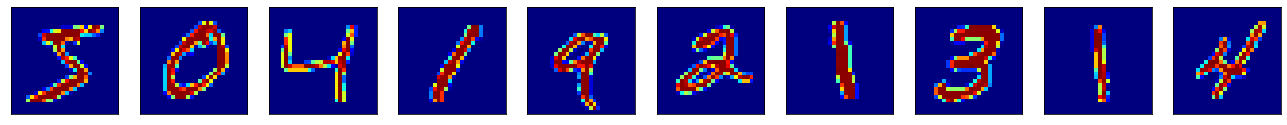

In [ ]:
# Define the height and width of the images
h, w = 28, 28

# Pick up 10 images and plot them using the function  plot_data()
images = dataDF.head(10)
fig = plot_data(images, h, w)
display(fig)

**_The answer should be_:**
<pre><code>
featuresDF:pyspark.sql.dataframe.DataFrame = [features: udt]
<img src="http://www.tsc.uc3m.es/~vanessa/figsdatabricks/fig_digits.png"/>
</code></pre>

### **1.c) Data preprocessing: normalization**

In general, normalization process consists of two steps:
1. Removing the mean of each feature
2. Rescaling each feature to make it to have a unit standard deviation

Because we are working with the sparse data (most of the input characteristics are zero), if we eliminate the mean, we would be converting null values into non-zero values, increasing the size (in memory) of the data set. To avoid this problem, here, we're just going to rescale the data.

**Exercise:** Complete the following cell to reescale the data by making use of the [StandardScaler()](https://spark.apache.org/docs/2.1.0/ml-features.html#standardscaler) method of MLLIB 

*Note:* StandardScaler method has two input variables, 'withMean' and 'withStd', which let you select, respectivelly, whether the mean and standard deviation are corrected or not.

In [ ]:
from pyspark.ml.feature import StandardScaler

# Define the normalizer object: indicate that you only want each feature to have unit standard deviation. Use the nomenclature "normFeatures" for column with the output normalized features.
scaler = StandardScaler(inputCol="features", outputCol="normFeatures", withMean=False, withStd=True)

# Fit the StandardScaler: learn the statistics of the data
scalerModel = scaler.fit(dataDF)

# Normalize the data: apply the normalization transformation
scaledData = scalerModel.transform(dataDF)

# For the first data: compare the first 10 original features with the normalized ones
firstData = scaledData.first()
print (firstData.features)
print (firstData.normFeatures)

(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,43.0,154.0,14.0,1.0,154.0,253.0,90.0,139.0,253.0,190.0,2.0,11.0,190.0,253.0,70.0,35.0,241.0,225.0,160.0,108.0,1.0,81.0,240.0,253.0,253.0,119.0,25.0,45.0,186.0,253.0,253.0,150.0,27.0,16.0,93.0,252.0,253.0,187.0,249.0,253.0,249.0,64.0,46.0,130.0,183.0,253.0,253.0,207.0,2.0,39.0,148.0,229.0,253.0,253.0,253.0,250.0,182.0,24.0,114.0,221.0,253.0,253.0,253.0,253.0,201.0,78.0,23.0,66.0,213.0,253.0,253.0,253.0,253.0,198.0,81.0,2.0,18.0,171.0,219.0,253.0,253.0,253.0,253.0,195.0,80.0,9.0,55.0,172.0,226.0,253.0,253.0,253.0,253.0,244.0,133.0,11.0,136.0,253.0,253.0,253.0,212.0,135.0,132.0,16.0])
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[0.031374699274264506,0.17461879779021092,0.16796228169449112,0.1659028392405828,1.1678132414369087,1.2938845179089489,1.7689104898164847,0.29044539967781535,2.1632873324779034,4.121038488523313,5.1997998744978355,3.640343824366569,0.45157429952347355,0.44707491080672346,1.0173131985418946,1.5175662830621006,1.5781000431417094,2.278875175954822,2.2554561559760304,2.252180252227004,2.252256492429137,2.2558702193596276,2.047866319570414,1.6579874660018918,2.7183550342922755,3.0986636639674123,3.152049964796779,1.3923097152389106,0.7658421810153346,3.0104730424041324,2.7419654131673727,2.486444660246641,2.3541724709075655,2.3009874899408693,2.2914916097068065,2.2909998474440236,2.2974400506953474,2.2952907311901622,2.267921272111156,0.8379804117490846,0.7548366072581753,0.8114156585513068,0.6372066614556388,0.5508906646726361,0.2476908910471118,2.486708535635483,2.5283423086813515,2.3592651710780523,2.2913405393264674,2.27702820036933,2.271724137963616,1.7807758614417155,1.6425668934145574,2.2299332173164816,2.170772337804973,0.8544541072865441,1.4944939655543321,0.9728245186881226,2.270080815920683,2.2724148950660115,1.8617957632542175,0.10094043619238478,0.3933049064364007,1.3931401221605737,0.13165507023515371,0.009061553059047187,1.3902480311438592,2.3431263444486485,0.8647658095874232,1.2773396350413717,2.4313015007527623,1.8976891186418021,0.019461389090040047,0.10167495542063257,1.8272021706491468,2.4551133651463943,0.6427626754183501,0.3290932873035842,2.216763427204788,1.9769095596166009,1.4336057497915133,0.9822845826719797,0.00891668531398235,0.7261248605550772,2.1102955107653676,2.310022172345761,2.303347013422948,1.0589164343226194,0.22507588447239335,0.3995875120020824,1.7013

**_The answer should be_:**
<pre><code>

scaledData:pyspark.sql.dataframe.DataFrame = [label: double, features: udt ... 1 more fields]
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,43.0,154.0,14.0,1.0,154.0,253.0,90.0,139.0,253.0,190.0,2.0,11.0,190.0,253.0,70.0,35.0,241.0,225.0,160.0,108.0,1.0,81.0,240.0,253.0,253.0,119.0,25.0,45.0,186.0,253.0,253.0,150.0,27.0,16.0,93.0,252.0,253.0,187.0,249.0,253.0,249.0,64.0,46.0,130.0,183.0,253.0,253.0,207.0,2.0,39.0,148.0,229.0,253.0,253.0,253.0,250.0,182.0,24.0,114.0,221.0,253.0,253.0,253.0,253.0,201.0,78.0,23.0,66.0,213.0,253.0,253.0,253.0,253.0,198.0,81.0,2.0,18.0,171.0,219.0,253.0,253.0,253.0,253.0,195.0,80.0,9.0,55.0,172.0,226.0,253.0,253.0,253.0,253.0,244.0,133.0,11.0,136.0,253.0,253.0,253.0,212.0,135.0,132.0,16.0])
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[0.0313746992743,0.17461879779,0.167962281694,0.165902839241,1.16781324144,1.29388451791,1.76891048982,0.290445399678,2.16328733248,4.12103848852,5.1997998745,3.64034382437,0.451574299523,0.447074910807,1.01731319854,1.51756628306,1.57810004314,2.27887517595,2.25545615598,2.25218025223,2.25225649243,2.25587021936,2.04786631957,1.657987466,2.71835503429,3.09866366397,3.1520499648,1.39230971524,0.765842181015,3.0104730424,2.74196541317,2.48644466025,2.35417247091,2.30098748994,2.29149160971,2.29099984744,2.2974400507,2.29529073119,2.26792127211,0.837980411749,0.754836607258,0.811415658551,0.637206661456,0.550890664673,0.247690891047,2.48670853564,2.52834230868,2.35926517108,2.29134053933,2.27702820037,2.27172413796,1.78077586144,1.64256689341,2.22993321732,2.1707723378,0.854454107287,1.49449396555,0.972824518688,2.27008081592,2.27241489507,1.86179576325,0.100940436192,0.393304906436,1.39314012216,0.131655070235,0.00906155305905,1.39024803114,2.34312634445,0.864765809587,1.27733963504,2.43130150075,1.89768911864,0.01946138909,0.101674955421,1.82720217065,2.45511336515,0.642762675418,0.329093287304,2.2167634272,1.97690955962,1.43360574979,0.982284582672,0.00891668531398,0.726124860555,2.11029551077,2.31002217235,2.30334701342,1.05891643432,0.225075884472,0.399587512002,1.70130881309,2.27197798538,2.2466124801,1.3655626317,0.259211726864,0.143775716578,0.829271068568,2.26554177068,2.33153880081,1.79754836007,2.26668995271,2.33659719779,2.38590306438,0.661548374398,0.413754654578,1.17165190083,1.66065585533,2.29572496719,2.32064527445,1.97823662681,0.020983924922,0.359260466363,1.34164450301,2.05445932202,2.278263651,2.28746146011,2.27736420656,2.29334426147,1.77539814939,0.22000788073,1.03243346072,1.98738766697,2.26690832656,2.26955640354,2.27484850349,2.27439815582,1.81882206387,0.732179856269,0.22266285417,0.606339512906,1.9165424544,2.26987964391,2.27755243488,2.29246976752,2.28769154631,1.78435214356,0.732288910278,0.0186042923307,0.277298148027,2.0468526399,2.23566468494,2.36335554322,2.26864304524,2.24178537474,2.24987684483,1.7389839255,0.71290878652,0.0808649657794,3.17383015057,5.77697670995,4.88987947084,3.90841606222,3.08008651516,2.64358837694,2.41960161221,2.23544809608,1.20314207182,0.0998116039286,14.4016804849,15.0628508981,9.24578113346,6.1820330158,3.82454344331,1.93687315699,1.62886671023,0.181318451848])
</code></pre>

When the scalerModel has been trained, we have learned some statistics of the data, such as, the mean value and standard deviation of each pixel. 

** Exercise**: extract the mean and standard deviation values from the scalerModel object. Plot these values using the plot_data() function.

*Note:* you can check the object parameters and functions with the command "help(scalerModel)"

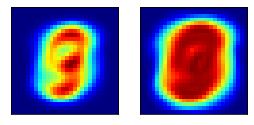

In [ ]:
# Analyze the scalerModel object. You can access to the mean and std of the data
meanValues = scalerModel.mean
stdValues= scalerModel.std

# Plot these values
fig = plot_data([scalerModel.mean,scalerModel.std] , h, w)
display(fig)

**_The answer should be_:**
<pre><code>
<img src="http://www.tsc.uc3m.es/~vanessa/figsdatabricks/fig_digits_stats.png"/>
</code></pre>

%md ### **1.d) Preparing training DF**

To finish the preprocessing of the data, let's create the training DF. So that this DF can interact with MLLIB functions, it is required that it has two columns with the following names:
* "label": where the data labels have to be stored.
* "features": where the features, used as input of the classifiers, have to be stored.

** Exercise**: transform the DF "scaledData" by selecting their columns "label" and "normFeatures" and, renaming this last column as "features". Call this new DF as "trainDF".

In [ ]:
# Create the training data DF
trainDF = scaledData.select("label","normFeatures").withColumnRenamed("normFeatures","features")

# Examine the resulting DF
trainDF.show(5)
trainDF.first()

+-----+--------------------+
label| features|
+-----+--------------------+
 5.0|(784,[152,153,154...|
 0.0|(784,[127,128,129...|
 4.0|(784,[160,161,162...|
 1.0|(784,[158,159,160...|
 9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Out[11]: Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348: 1.8272, 349: 2.4551, 350: 0.6428, 376: 0.3291, 377: 2.2168, 378: 1.9769, 379: 1.4336, 380: 0.9823, 381: 0.0089, 405: 0.7261, 406: 2.1103, 407: 2.31, 408: 2.3033, 409: 1.0589, 410: 0.2251, 434: 0.3996, 435: 1.7013, 436: 2.272, 437: 2.2466, 438: 1.3656, 439: 0.2592, 463: 0.1438, 464: 0.8293, 465: 2.2655, 466: 2.3315, 467: 1.7975, 493: 2.2667, 494: 2.3366, 495: 2.3859, 496: 0.6615, 518: 0.4138, 519: 1.1717, 520: 1.6607, 521: 2.2957, 522: 2.3206, 523: 1.9782, 524: 0.021, 544: 0.3593, 545: 1.3416, 546: 2.0545, 547: 2.2783, 548: 2.2875, 549: 2.2774, 550: 2.2933, 551: 1.7754, 570: 0.22, 571: 1.0324, 572: 1.9874, 573: 2.2669, 574: 2.2696, 575: 2.2748, 576: 2.2744, 577: 1.8188, 578: 0.7322, 596: 0.2227, 597: 0.6063, 598: 1.9165, 599: 2.2699, 600: 2.2776, 601: 2.2925, 602: 2.2877, 603: 1.7844, 604: 0.7323, 605: 0.0186, 622: 0.2773, 623: 2.0469, 624: 2.2357, 625: 2.3634, 626: 2.2686, 627: 2.2418, 628: 2.2499, 629: 1.739, 630: 0.7129, 631: 0.0809, 648: 3.1738, 649: 5.777, 650: 4.8899, 651: 3.9084, 652: 3.0801, 653: 2.6436, 654: 2.4196, 655: 2.2354, 656: 1.2031, 657: 0.0998, 676: 14.4017, 677: 15.0629, 678: 9.2458, 679: 6.182, 680: 3.8245, 681: 1.9369, 682: 1.6289, 683: 0.1813}))

**_The answer should be_:**
<pre><code>
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Out[30]: Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348: 1.8272, 349: 2.4551, 350: 0.6428, 376: 0.3291, 377: 2.2168, 378: 1.9769, 379: 1.4336, 380: 0.9823, 381: 0.0089, 405: 0.7261, 406: 2.1103, 407: 2.31, 408: 2.3033, 409: 1.0589, 410: 0.2251, 434: 0.3996, 435: 1.7013, 436: 2.272, 437: 2.2466, 438: 1.3656, 439: 0.2592, 463: 0.1438, 464: 0.8293, 465: 2.2655, 466: 2.3315, 467: 1.7975, 493: 2.2667, 494: 2.3366, 495: 2.3859, 496: 0.6615, 518: 0.4138, 519: 1.1717, 520: 1.6607, 521: 2.2957, 522: 2.3206, 523: 1.9782, 524: 0.021, 544: 0.3593, 545: 1.3416, 546: 2.0545, 547: 2.2783, 548: 2.2875, 549: 2.2774, 550: 2.2933, 551: 1.7754, 570: 0.22, 571: 1.0324, 572: 1.9874, 573: 2.2669, 574: 2.2696, 575: 2.2748, 576: 2.2744, 577: 1.8188, 578: 0.7322, 596: 0.2227, 597: 0.6063, 598: 1.9165, 599: 2.2699, 600: 2.2776, 601: 2.2925, 602: 2.2877, 603: 1.7844, 604: 0.7323, 605: 0.0186, 622: 0.2773, 623: 2.0469, 624: 2.2357, 625: 2.3634, 626: 2.2686, 627: 2.2418, 628: 2.2499, 629: 1.739, 630: 0.7129, 631: 0.0809, 648: 3.1738, 649: 5.777, 650: 4.8899, 651: 3.9084, 652: 3.0801, 653: 2.6436, 654: 2.4196, 655: 2.2354, 656: 1.2031, 657: 0.0998, 676: 14.4017, 677: 15.0629, 678: 9.2458, 679: 6.182, 680: 3.8245, 681: 1.9369, 682: 1.6289, 683: 0.1813}))
</code></pre>

### **1.e) Preparing the test DF**
Now, let's load and preprocess the test data.

** Exercise**: load the test data file ("mnist.t") and apply the normalization that you have already learned with the training data (i.e., the test data have to be normalized with the standard deviation of the training data). 

As result, you have to provide a new DF, called "testDF", with the columns: "label" (where you have to store the test data labels) and "features" (where the normalized test data features have to be stored).

In [ ]:
# Load test data
fileName_test = "dbfs:/FileStore/shared_uploads/100449779@alumnos.uc3m.es/mnist.t"
dataTestDF = spark.read.format("libsvm").option("numFeatures", "784").load(fileName_test)
# Normalize the test data
scaledDataTest = scalerModel.transform(dataTestDF)
# Create the test DF
testDF = scaledDataTest.select("label","normFeatures").withColumnRenamed("normFeatures","features")

# Examine the resulting DF
testDF.show(10)
testDF.first()

+-----+--------------------+
label| features|
+-----+--------------------+
 7.0|(784,[202,203,204...|
 2.0|(784,[94,95,96,97...|
 1.0|(784,[128,129,130...|
 0.0|(784,[124,125,126...|
 4.0|(784,[150,151,159...|
 1.0|(784,[156,157,158...|
 4.0|(784,[149,150,151...|
 9.0|(784,[179,180,181...|
 5.0|(784,[129,130,131...|
 9.0|(784,[209,210,211...|
+-----+--------------------+
only showing top 10 rows

Out[12]: Row(label=7.0, features=SparseVector(784, {202: 1.7427, 203: 2.8914, 204: 2.0112, 205: 1.6365, 206: 0.5897, 207: 0.335, 230: 3.9602, 231: 3.4952, 232: 2.8841, 233: 2.5383, 234: 2.3686, 235: 2.1827, 236: 1.782, 237: 1.7779, 238: 1.7808, 239: 1.787, 240: 1.7876, 241: 1.7835, 242: 1.7776, 243: 1.7967, 244: 1.6253, 245: 0.5613, 258: 1.1105, 259: 1.4607, 260: 0.769, 261: 1.0921, 262: 1.482, 263: 2.0368, 264: 2.2814, 265: 2.0434, 266: 2.3308, 267: 2.3357, 268: 2.3232, 269: 2.2616, 270: 2.0605, 271: 2.3095, 272: 2.4288, 273: 1.5077, 291: 0.1535, 292: 0.6113, 293: 0.1345, 294: 0.6507, 295: 0.6369, 296: 0.6238, 297: 0.5376, 298: 0.1901, 299: 2.1627, 300: 2.4793, 301: 1.1789, 326: 0.7517, 327: 2.3442, 328: 2.111, 329: 0.2115, 353: 0.198, 354: 2.0945, 355: 2.397, 356: 0.8737, 381: 1.1503, 382: 2.277, 383: 2.2733, 384: 0.4736, 408: 0.5371, 409: 2.2157, 410: 2.2868, 411: 0.5946, 436: 1.1944, 437: 2.2555, 438: 1.7024, 439: 0.048, 463: 0.0809, 464: 1.828, 465: 2.2296, 466: 0.5345, 491: 1.1273, 492: 2.287, 493: 1.6568, 518: 0.6746, 519: 2.2622, 520: 2.1779, 521: 0.5172, 545: 0.1722, 546: 1.9827, 547: 2.2873, 548: 1.5009, 572: 0.027, 573: 1.8189, 574: 2.2785, 575: 1.9691, 576: 0.3146, 600: 0.3421, 601: 2.3015, 602: 2.2967, 603: 0.6939, 627: 0.2747, 628: 1.992, 629: 2.2651, 630: 1.0248, 631: 0.009, 655: 1.2185, 656: 2.2977, 657: 2.3047, 658: 0.482, 682: 0.7527, 683: 2.7424, 684: 2.7881, 685: 2.8049, 686: 0.6033, 710: 2.3262, 711: 4.4795, 712: 4.3152, 713: 3.7599, 714: 0.7319, 738: 3.9295, 739: 7.4372, 740: 5.8657, 741: 0.5192}))

**_The answer should be_:**
<pre><code>
dataTestDF:pyspark.sql.dataframe.DataFrame = [label: double, features: udt]
scaledDataTest:pyspark.sql.dataframe.DataFrame = [label: double, features: udt ... 1 more fields]
testDF:pyspark.sql.dataframe.DataFrame = [label: double, features: udt]
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  7.0|(784,[202,203,204...|
|  2.0|(784,[94,95,96,97...|
|  1.0|(784,[128,129,130...|
|  0.0|(784,[124,125,126...|
|  4.0|(784,[150,151,159...|
+-----+--------------------+
only showing top 5 rows

Out[31]: Row(label=7.0, features=SparseVector(784, {202: 1.7427, 203: 2.8914, 204: 2.0112, 205: 1.6365, 206: 0.5897, 207: 0.335, 230: 3.9602, 231: 3.4952, 232: 2.8841, 233: 2.5383, 234: 2.3686, 235: 2.1827, 236: 1.782, 237: 1.7779, 238: 1.7808, 239: 1.787, 240: 1.7876, 241: 1.7835, 242: 1.7776, 243: 1.7967, 244: 1.6253, 245: 0.5613, 258: 1.1105, 259: 1.4607, 260: 0.769, 261: 1.0921, 262: 1.482, 263: 2.0368, 264: 2.2814, 265: 2.0434, 266: 2.3308, 267: 2.3357, 268: 2.3232, 269: 2.2616, 270: 2.0605, 271: 2.3095, 272: 2.4288, 273: 1.5077, 291: 0.1535, 292: 0.6113, 293: 0.1345, 294: 0.6507, 295: 0.6369, 296: 0.6238, 297: 0.5376, 298: 0.1901, 299: 2.1627, 300: 2.4793, 301: 1.1789, 326: 0.7517, 327: 2.3442, 328: 2.111, 329: 0.2115, 353: 0.198, 354: 2.0945, 355: 2.397, 356: 0.8737, 381: 1.1503, 382: 2.277, 383: 2.2733, 384: 0.4736, 408: 0.5371, 409: 2.2157, 410: 2.2868, 411: 0.5946, 436: 1.1944, 437: 2.2555, 438: 1.7024, 439: 0.048, 463: 0.0809, 464: 1.828, 465: 2.2296, 466: 0.5345, 491: 1.1273, 492: 2.287, 493: 1.6568, 518: 0.6746, 519: 2.2622, 520: 2.1779, 521: 0.5172, 545: 0.1722, 546: 1.9827, 547: 2.2873, 548: 1.5009, 572: 0.027, 573: 1.8189, 574: 2.2785, 575: 1.9691, 576: 0.3146, 600: 0.3421, 601: 2.3015, 602: 2.2967, 603: 0.6939, 627: 0.2747, 628: 1.992, 629: 2.2651, 630: 1.0248, 631: 0.009, 655: 1.2185, 656: 2.2977, 657: 2.3047, 658: 0.482, 682: 0.7527, 683: 2.7424, 684: 2.7881, 685: 2.8049, 686: 0.6033, 710: 2.3262, 711: 4.4795, 712: 4.3152, 713: 3.7599, 714: 0.7319, 738: 3.9295, 739: 7.4372, 740: 5.8657, 741: 0.5192}))
</code></pre>

## **2. Solving classification problems**

MLLIB includes distributed implementations of the most common classifiers, such as, logistic regression, decission trees, random forest or linear SVMs. In this notebook, we are going to use the linear SVM as classifier. But the procedure to train, predict and evaluate this classifier would be similar to any of the other classifiers, so you can easily extend the content of this notebook to other classifiers.

**2.a) Binary classification with SVMs**

As you know, standard SVM is a binary classifier. So, to start to work with this classifier, let's convert the multiclass original problem to a binary one by solving the problem of differentiating the digits "3" from the digits "5".

**Exercise**: Built the binary DFs for training and testing by following these steps:
1. Select form the "trainDF" and "testDF" the rows with label "3" or "5" (use filter()). 
2. Convert the label values of the resulting DF to the binary values "0" and "1". For this purpose, you can use the "changeLabels" UDF defined in the next cell.

In [ ]:
from pyspark.sql.types import *
# User defined function to convert labels "3" and "5" to binary values "1" and "0" 
changeLabels = udf(lambda label: 1 if (label==3) else 0, IntegerType())

In [ ]:
# Create the training DF for the binary problem 3 vs. 5 
## Select digits 3 and 5
trainDFBinaryAux= trainDF.filter("label=3 or label=5")
trainDFBinaryAux.head(5)

Out[14]: [Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348: 1.8272, 349: 2.4551, 350: 0.6428, 376: 0.3291, 377: 2.2168, 378: 1.9769, 379: 1.4336, 380: 0.9823, 381: 0.0089, 405: 0.7261, 406: 2.1103, 407: 2.31, 408: 2.3033, 409: 1.0589, 410: 0.2251, 434: 0.3996, 435: 1.7013, 436: 2.272, 437: 2.2466, 438: 1.3656, 439: 0.2592, 463: 0.1438, 464: 0.8293, 465: 2.2655, 466: 2.3315, 467: 1.7975, 493: 2.2667, 494: 2.3366, 495: 2.3859, 496: 0.6615, 518: 0.4138, 519: 1.1717, 520: 1.6607, 521: 2.2957, 522: 2.3206, 523: 1.9782, 524: 0.021, 544: 0.3593, 545: 1.3416, 546: 2.0545, 547: 2.2783, 548: 2.2875, 549: 2.2774, 550: 2.2933, 551: 1.7754, 570: 0.22, 571: 1.0324, 572: 1.9874, 573: 2.2669, 574: 2.2696, 575: 2.2748, 576: 2.2744, 577: 1.8188, 578: 0.7322, 596: 0.2227, 597: 0.6063, 598: 1.9165, 599: 2.2699, 600: 2.2776, 601: 2.2925, 602: 2.2877, 603: 1.7844, 604: 0.7323, 605: 0.0186, 622: 0.2773, 623: 2.0469, 624: 2.2357, 625: 2.3634, 626: 2.2686, 627: 2.2418, 628: 2.2499, 629: 1.739, 630: 0.7129, 631: 0.0809, 648: 3.1738, 649: 5.777, 650: 4.8899, 651: 3.9084, 652: 3.0801, 653: 2.6436, 654: 2.4196, 655: 2.2354, 656: 1.2031, 657: 0.0998, 676: 14.4017, 677: 15.0629, 678: 9.2458, 679: 6.182, 680: 3.8245, 681: 1.9369, 682: 1.6289, 683: 0.1813})),
 Row(label=3.0, features=SparseVector(784, {151: 0.443, 152: 0.4497, 153: 1.0186, 154: 2.3795, 155: 2.3319, 156: 2.3449, 157: 2.407, 158: 2.5573, 159: 2.8263, 160: 2.2675, 161: 0.097, 177: 0.534, 178: 1.5043, 179: 2.2074, 180: 2.0979, 181: 2.2699, 182: 2.2555, 183: 2.2433, 184: 2.2434, 185: 2.247, 186: 2.2936, 187: 2.4291, 188: 2.7076, 189: 2.0231, 190: 0.2263, 205: 1.9291, 206: 2.4766, 207: 2.3449, 208: 2.2919, 209: 2.2824, 210: 2.291, 211: 2.2884, 212: 2.2862, 213: 2.277, 214: 2.2707, 215: 2.3197, 216: 2.4936, 217: 2.8674, 218: 0.8334, 233: 1.0893, 234: 2.3499, 235: 2.2823, 236: 2.07, 237: 1.1852, 238: 1.1962, 239: 1.1913, 240: 1.1917, 241: 1.7024, 242: 2.2624, 243: 2.2867, 244: 2.4092, 245: 2.7202, 246: 0.7858, 261: 0.0383, 262: 0.2637, 263: 0.2602, 264: 0.2156, 269: 0.1266, 270: 2.0335, 271: 2.2913, 272: 2.4097, 273: 1.8523, 274: 0.0935, 297: 0.7745, 298: 2.1998, 299: 2.3094, 300: 2.4598, 301: 1.6016, 324: 0.8152, 325: 1.7192, 326: 2.2822, 327: 2.3349, 328: 2.5454, 329: 0.1645, 350: 0.8356, 351: 1.9127, 352: 2.2487, 353: 2.2681, 354: 2.2652, 355: 2.3688, 356: 2.1475, 357: 0.1106, 373: 0.2923, 374: 1.1354, 375: 1.7818, 376: 1.8147, 377: 1.7753, 378: 2.2229, 379: 2.2579, 380: 2.292, 381: 2.247, 382: 2.1336, 383: 0.9743, 384: 0.3014, 400: 0.4316, 401: 2.0292, 402: 2.3002, 403: 2.3251, 404: 2.3287, 405: 2.2591, 406: 2.2246, 407: 2.3009, 408: 2.2942, 409: 2.2424, 410: 1.5935, 428: 0.4359, 429: 2.0616, 430: 2.331, 431: 2.3349, 432: 2.3089, 433: 2.2467, 434: 2.2643, 435: 2.3141, 436: 2.272, 437: 2.2466, 438: 2.3032, 439: 0.7104, 457: 0.295, 458: 1.1584, 459: 0.4848, 460: 0.4, 461: 0.3896, 462: 0.3906, 463: 0.3954, 464: 1.2751, 465: 2.2655, 466: 2.3223, 467: 0.7113, 492: 0.1351, 493: 2.294, 494: 2.3274, 495: 0.7091, 520: 0.7804, 521: 2.2867, 522: 2.3115, 523: 0.7072, 538: 0.0

In [ ]:
## Convert labels to 0 and 1
trainDFBinary = trainDFBinaryAux.select(changeLabels("label").alias("label"),"features")
trainDFBinary.show(5)
print ('Number of traning samples ' + str(trainDFBinary.count()))

+-----+--------------------+
label| features|
+-----+--------------------+
 0|(784,[152,153,154...|
 1|(784,[151,152,153...|
 1|(784,[123,124,125...|
 0|(784,[216,217,218...|
 1|(784,[143,144,145...|
+-----+--------------------+
only showing top 5 rows

Number of traning samples 11552

In [ ]:
# Create the test DF for the binary problem 3 vs. 5 
## Select digits 3 and 5
testDFBinaryAux = testDF.filter("label=3 or label=5")
## Convert labels to 0 and 1
testDFBinary = testDFBinaryAux.select(changeLabels("label").alias("label"),"features")
testDFBinary.show(5)
print ('Number of test samples ' + str(testDFBinary.count()))

+-----+--------------------+
label| features|
+-----+--------------------+
 0|(784,[129,130,131...|
 0|(784,[124,125,126...|
 1|(784,[118,119,120...|
 0|(784,[156,157,158...|
 1|(784,[175,176,177...|
+-----+--------------------+
only showing top 5 rows

Number of test samples 1902

**_The answer should be_:**
<pre><code>
+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[152,153,154...|
|    1|(784,[151,152,153...|
|    1|(784,[123,124,125...|
|    0|(784,[216,217,218...|
|    1|(784,[143,144,145...|
+-----+--------------------+
only showing top 5 rows

Number of traning samples 11552
+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[129,130,131...|
|    0|(784,[124,125,126...|
|    1|(784,[118,119,120...|
|    0|(784,[156,157,158...|
|    1|(784,[175,176,177...|
+-----+--------------------+
only showing top 5 rows

Number of test samples 1902
</code></pre>

**Exercise**: Train a binary [linear SVM classifier](https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-support-vector-machine) able to differenciate digits 3 from digits 5. Show the coefficients and bias (or intercept) of the resulting classifier.

*Note:* After training the lsvc object, you will obtain a new object (lsvcModel) with the trained SVM. Remember that you can check their parameters and methods typing help(lsvcModel)

In [ ]:
from pyspark.ml.classification import LinearSVC

# Define your classifier
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(trainDFBinary)

In [ ]:
# Print the coefficients and intercept for linearsSVC
coefficients = lsvcModel.coefficients
intercept = lsvcModel.intercept
print("Some coefficients: " + str(coefficients[250:300]))
print("Intercept: " + str(intercept))

Some coefficients: [-0.00811581 -0.00155393 0. 0.00075426 0.00546287 0.01589203
 0.02332875 0.02345315 0.01133168 0.00204586 -0.01587148 -0.03831883
 -0.05673717 -0.06903806 -0.04944357 -0.0330097 -0.00822104 0.02422009
 0.0333946 0.03522194 0.03150301 0.02456392 0.01293632 -0.0133156
 -0.02713423 -0.0401274 -0.03177593 -0.01787716 -0.00728533 -0.00161424
 0. 0.00175353 0.00669578 0.01628817 0.01763349 0.00970026
 -0.00178221 -0.02566225 -0.05377013 -0.07652784 -0.08909582 -0.08746426
 -0.05756012 -0.01961768 0.01662599 0.03718076 0.04844331 0.05106937
 0.04733887 0.03992283]
Intercept: -0.0014977608187345837

**_The answer should be_:**
<pre><code>
Some coefficients: [-0.00811581 -0.00155393  0.          0.00075426  0.00546287  0.01589203
  0.02332875  0.02345315  0.01133168  0.00204586 -0.01587148 -0.03831883
 -0.05673717 -0.06903806 -0.04944357 -0.0330097  -0.00822104  0.02422009
  0.0333946   0.03522194  0.03150301  0.02456392  0.01293632 -0.0133156
 -0.02713423 -0.0401274  -0.03177593 -0.01787716 -0.00728533 -0.00161424
  0.          0.00175353  0.00669578  0.01628817  0.01763349  0.00970026
 -0.00178221 -0.02566225 -0.05377013 -0.07652784 -0.08909582 -0.08746426
 -0.05756012 -0.01961768  0.01662599  0.03718076  0.04844331  0.05106937
  0.04733887  0.03992283]
Intercept: -0.00149776081873
</code></pre>

**2.b) SVM evaluation**

**Exercise**: Compute the SVM output over the test data and compute the SVM accuracy (percentage of correctly classified data) over the test data.

*Note 1:* To compute the predictions of a MLLIB classifier over a DF, you can use the method "transform" of the classifier model (lsvcModel).

*Note 2:* MLLIB includes two objects two evaluate the performance of classification problems:
* [BinaryClassificationEvaluator](https://spark.apache.org/docs/2.2.0/mllib-evaluation-metrics.html#binary-classification) which only includes specific measurements for binary problems, such as, the AUC ("areaUnderROC") and area under the Precision-Recall curve ("areaUnderPR").
* [MulticlassClassificationEvaluator](https://spark.apache.org/docs/2.2.0/api/scala/index.html#org.apache.spark.ml.evaluation.MulticlassClassificationEvaluator) which let the user evaluate measurements common of binary and multiclass problems, such as, "f1" (default), "weightedPrecision", "weightedRecall", **"accuracy"**.

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Compute predictions for test data
predictions = lsvcModel.transform(testDFBinary) 

# Show the computed predictions and compare with the original labels
predictions.select("features", "label", "prediction").show(10)

+--------------------+-----+----------+
 features|label|prediction|
+--------------------+-----+----------+
(784,[129,130,131...| 0| 0.0|
(784,[124,125,126...| 0| 0.0|
(784,[118,119,120...| 1| 1.0|
(784,[156,157,158...| 0| 0.0|
(784,[175,176,177...| 1| 1.0|
(784,[148,149,150...| 1| 1.0|
(784,[121,122,123...| 1| 1.0|
(784,[152,153,154...| 0| 0.0|
(784,[172,173,174...| 1| 1.0|
(784,[163,164,165...| 0| 0.0|
+--------------------+-----+----------+
only showing top 10 rows

In [ ]:
# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

Test accuracy = 0.950578

**_The answer should be_:**
<pre><code>
predictions:pyspark.sql.dataframe.DataFrame = [label: integer, features: udt ... 2 more fields]
+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[129,130,131...|    0|       0.0|
|(784,[124,125,126...|    0|       0.0|
|(784,[118,119,120...|    1|       1.0|
|(784,[156,157,158...|    0|       0.0|
|(784,[175,176,177...|    1|       1.0|
|(784,[148,149,150...|    1|       1.0|
|(784,[121,122,123...|    1|       1.0|
|(784,[152,153,154...|    0|       0.0|
|(784,[172,173,174...|    1|       1.0|
|(784,[163,164,165...|    0|       0.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy = 0.950578
</code></pre>

**2.c) Multiclass SVM**

Now let's solve the original multiclass problem. Despite MLLIB SVM implementation only admits binary problems, MLLIB includes a wrapper to solve [multiclass problems 1 vs. all](https://spark.apache.org/docs/latest/ml-classification-regression.html#one-vs-rest-classifier-aka-one-vs-all) fashion.

**Exercise**: Train a multiclass SVM classifier to classify digit images from "0" to "9" and compute its accuracy over the test data. For this purpose, use the dataframes trainDF and testDF generated in Sections 1.d) and 1.e).

*Note:* the 1 vs all approach has to train 10 binary classifiers, so the training can take a while (please, be patient)

In [ ]:
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define your binary classifier
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Define the One Vs All Classifier.
ovr = OneVsRest(classifier=lsvc)

# train the multiclass model.
ovrModel = ovr.fit(trainDF)

# score the model on test data.
predictions = ovrModel.transform(testDF)

# Show the computed predictions and compare with the original labels
predictions.select("features", "label", "prediction").show(10)

# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator =  MulticlassClassificationEvaluator(metricName="accuracy")
accuracy =  evaluator.evaluate(predictions) 

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

+--------------------+-----+----------+
 features|label|prediction|
+--------------------+-----+----------+
(784,[202,203,204...| 7.0| 7.0|
(784,[94,95,96,97...| 2.0| 2.0|
(784,[128,129,130...| 1.0| 1.0|
(784,[124,125,126...| 0.0| 0.0|
(784,[150,151,159...| 4.0| 4.0|
(784,[156,157,158...| 1.0| 1.0|
(784,[149,150,151...| 4.0| 4.0|
(784,[179,180,181...| 9.0| 9.0|
(784,[129,130,131...| 5.0| 4.0|
(784,[209,210,211...| 9.0| 9.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy = 0.8605

**_The answer should be_:**
<pre><code>
+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[202,203,204...|  7.0|       7.0|
|(784,[94,95,96,97...|  2.0|       2.0|
|(784,[128,129,130...|  1.0|       1.0|
|(784,[124,125,126...|  0.0|       0.0|
|(784,[150,151,159...|  4.0|       4.0|
|(784,[156,157,158...|  1.0|       1.0|
|(784,[149,150,151...|  4.0|       4.0|
|(784,[179,180,181...|  9.0|       9.0|
|(784,[129,130,131...|  5.0|       4.0|
|(784,[209,210,211...|  9.0|       9.0|
+--------------------+-----+----------+
only showing top 10 rows
Test accuracy = 0.8605
</code></pre>

**2.d) Cross validation of hyperparameters**

As you know, the linear SVM has a hyper parameter C, which makes a trade off between the margin and the number of wrongly classified samples, and its value becomes critical for the final SVM performance and generalization capability. So far, we have set its value to 0.1 (regParam = 0.1). In this section we are going to use one of the MLLIB parameter tunning utilities to properly adjust its value.

MLLIB includes two objects to carry out this validation process:

* [CrossValidator](https://spark.apache.org/docs/latest/ml-tuning.html#cross-validation)
* [TrainValidationSplit](https://spark.apache.org/docs/latest/ml-tuning.html#train-validation-split)

Whereas 'CrossValidator' runs standard cross validation with a prefixed number of partitions, 'TrainValidationSplit' only evaluates each combination of parameters once. So, 'TrainValidationSplit' is computationally less expensive, but it will not produce as reliable results when the training dataset is not sufficiently large.

Due to the execution a complete cross-validation process would take a long time. We will here perform the adjustment of C using the quick MLLIB version ('TrainValidationSplit') and, in addition, we are going to work again over the binary problem (classification of the digits "3" and "5").

**Exercise:** Train and evaluate a binary linear SVM classifier when is solving the task of differenciating digits 3 from digits 5 (use the trainDFBinary and testDFBinary generated in Section 2.a)). Adjust its parameter C with a 'TrainValidationSplit' procedure using a 20% of the data for validation and exploring the following range of C values: 100, 10, 1, 0.1, 0.01.

*Note:* You may need to use the method [ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.tuning.ParamGridBuilder) to declarate the range of values to explore and after training the TrainValidationSplit model, you can analyze the model_tvs to check the selected value.

In [ ]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


# Define the  the Classifier
lsvc = LinearSVC(maxIter=10)

# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using the evaluator.
paramGrid = ParamGridBuilder().addGrid(lsvc.regParam,[10, 1, 0.1, 0.01, 0.001, 0.0001]).build() #valores corregidos del enunciado

# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, an Evaluator and the percentage of training/validation data
tvs = TrainValidationSplit(estimator=lsvc,
                           estimatorParamMaps=paramGrid,
                           evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                           # porcentaje de datos para entrenamiento (80%) y resto para validacion (20% como indica el enunciado)
                           trainRatio=0.8)
# Run TrainValidationSplit to choose the best parameter. It also trains the final model for the selected value of C.
model_tvs = tvs.fit(trainDFBinary) 
# Check the validation accuracy over each C value 
print ("Validation accuracies:")
print (model_tvs.validationMetrics)
# Make predictions on test data. 
predictions = model_tvs.transform(testDFBinary) 
#predictions.select("features", "label", "prediction").show(10)
# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)
Validation accuracies:
[0.9278260869565217, 0.9469565217391305, 0.9478260869565217, 0.9491304347826087, 0.9478260869565217, 0.947391304347826]
Test accuracy = 0.95163

**_The answer should be_:**
<pre><code>
Validation accuracies:
[0.930959617889709, 0.9452887537993921, 0.9444203213200174, 0.9448545375597047, 0.9444203213200174, 0.9448545375597047]
Test accuracy = 0.950578
</code></pre>

El regParam que para nuestro modelo más precisión en las validaciones produce es el regParam=0.01 (cuarto caso de C).